In [1]:
import shutil
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import os 
import sys
import matplotlib.pyplot as plt
import pandas as pd
from pyDOE import lhs
%load_ext autoreload
%autoreload 2
import time


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
tfm = tfp.models

In [3]:
inputs = np.loadtxt('./test_Data/X.txt')

In [4]:
outputs = np.loadtxt('./test_Data/Y.txt')

In [5]:
print(inputs.shape)

(100, 4)


In [6]:
labels = ['u1','u2', 'u3','u4']

In [7]:
model = tfm.BGP_model(inputs, outputs, kernel_type = 'RBF', noise_level = 1e-2, labels = labels)

In [8]:
model_info = model.run_mcmc(mcmc_samples = 8000, num_leapfrog_steps = 3, estimate_noise = False, warm_up = True)

Noise variance is fixed.
Excecuting the warmup.
Warmup: 
Warm-Up Iteration:   0 Acceptance Rate: 1.000
Warm-Up Iteration: 500 Acceptance Rate: 0.635
Warm-Up Iteration: 1000 Acceptance Rate: 0.608
Warm-Up Iteration: 1500 Acceptance Rate: 0.600
Warm-Up Iteration: 2000 Acceptance Rate: 0.594
Warm-Up Iteration: 2500 Acceptance Rate: 0.586
Warm-Up Iteration: 3000 Acceptance Rate: 0.583
Warm-Up Iteration: 3500 Acceptance Rate: 0.585
Warm-Up Iteration: 3999 Acceptance Rate: 0.584
Sampling in progress.


W0304 19:11:18.358540 140052413175616 deprecation.py:323] From /root/.local/lib/python3.6/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bayesiangp.py:235: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Acceptance rate of the HMC sampling: 0.889375


In [9]:
print(model_info)

{'samples': {'kernel_variance': array([1.014212  , 0.99883676, 0.55398184, ..., 1.2272345 , 0.7200185 ,
       0.7625294 ], dtype=float32), 'kernel_inverse_lengthscales': array([[0.551208  , 0.37606382, 0.39491832, 2.9642544 ],
       [0.50315815, 0.23331504, 0.2543795 , 3.4002006 ],
       [0.9908907 , 0.40162852, 0.33868968, 3.5194838 ],
       ...,
       [1.0684323 , 0.16436519, 0.5100645 , 1.6471642 ],
       [1.4894174 , 0.2144891 , 0.29613733, 1.983953  ],
       [1.1409521 , 0.27583408, 0.3264189 , 2.1888368 ]], dtype=float32), 'gp_constant_mean_function': array([-0.47689936, -0.10569417,  0.04310594, ..., -0.04179297,
       -0.02369389,  0.02311579], dtype=float32)}, 'kernel_type': 'RBF', 'noise_level': 0.01}


In [10]:
model = tfm.BGP_model(inputs, outputs, model_info = model_info, labels = labels)

/root/.local/lib/python3.6/site-packages/tensorflow_probability/python/models/bayesgp/scripts/bgpmodel.py:53: UserWarning: Retrieving model info from previous run. The inputs and outputs arrays must be the same as the previous run.
  warnings.warn("Retrieving model info from previous run. The inputs and outputs arrays must be the same as the previous run.")


In [11]:
model.plot_chains(directory_path  = './')

In [12]:
mean_pos, std_pos, samples = model.predict(inputs, with_point_samples = True)

In [13]:
lower = np.percentile(samples,2.5, axis = 0)
upper = np.percentile(samples,97.5, axis = 0)

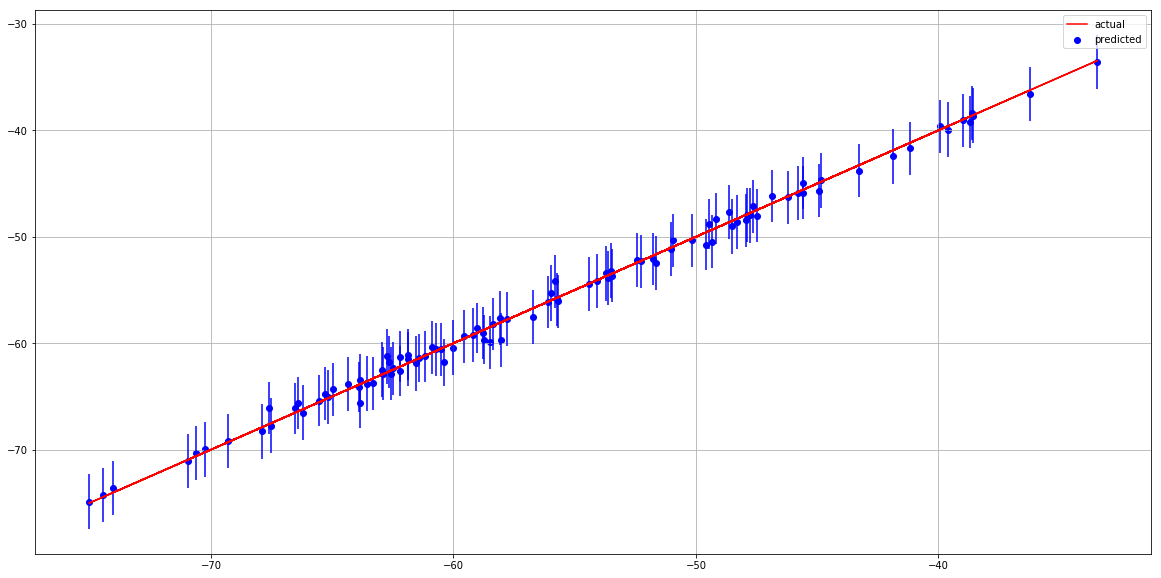

In [14]:
# Predicted vs actual
plt.figure(figsize =(20,10))
plt.plot(outputs, outputs , color = 'red', label ='actual')
plt.scatter(outputs, mean_pos, color = 'blue', label = 'predicted')
plt.vlines(outputs,lower, upper, color = 'blue')
plt.legend()
plt.grid()